# Bank Loan Prediction Project

## Project Description

This project aims to predict whether a customer will take a personal loan based on their demographic and financial data using machine learning models.

### a. General Information on Dataset
- **Dataset Name**: Bank Loan Dataset (bankloan.csv)
- **Number of Classes**: 2
  - Class 0: No Loan (Customer does not take a personal loan)
  - Class 1: Loan (Customer takes a personal loan)
- **Total Number of Samples**: 5000
- **Training Samples**: 4000 (80%)
- **Testing Samples**: 1000 (20%)
- **No Validation Set**: Used simple train-test split without cross-validation

### b. Implementation Details
- **Feature Extraction**: 13 features extracted from the dataset after dropping the ID column
  - Features: Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Securities Account, CD Account, Online, CreditCard
  - Dimension: (5000, 13)
- **Cross-Validation**: Not used. Simple train-test split with test_size=0.2 and random_state=42
- **Preprocessing**: StandardScaler applied to features for both models
- **Models**:
  - Linear Regression: Used for regression, predictions thresholded at 0.5 for classification. No hyperparameters tuned (default settings).
  - KNN: n_neighbors=5, used for regression, predictions thresholded at 0.5 for classification.

### c. Results Details
Results for each model on testing data are shown below, including accuracy, confusion matrix, and ROC curve.

In [28]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [29]:
df = pd.read_csv(r"archive\bankloan.csv")

In [30]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [32]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [33]:
df = df.drop(columns=["ID"])

In [34]:
X = df.drop("Personal.Loan", axis=1)
y = df["Personal.Loan"]

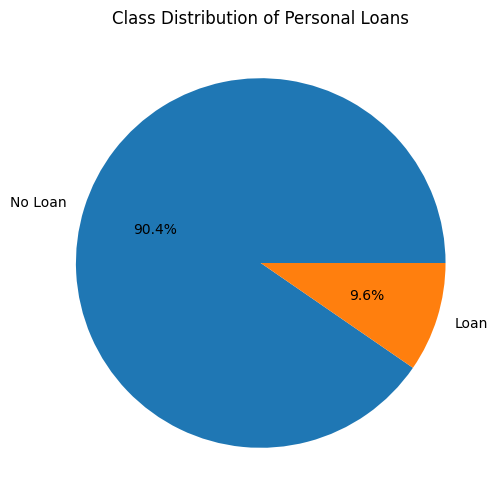

In [35]:
plt.figure(figsize=(6,6))
plt.pie(y.value_counts(), labels=['No Loan', 'Loan'], autopct='%1.1f%%')
plt.title('Class Distribution of Personal Loans')
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression (With Scaling):")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))

y_pred_lr = (y_pred_lr >= 0.5).astype(int)

acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", acc_lr)

Linear Regression (With Scaling):
MAE: 0.16032395346942324
MSE: 0.05447410684301349
RMSE: 0.23339688696084507
R²: 0.42033405860054807
Accuracy: 0.925


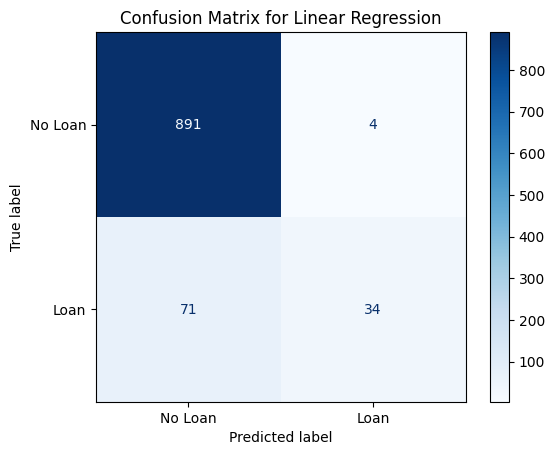

In [38]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No Loan', 'Loan'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Linear Regression')
plt.show()

In [39]:
print("Classification Report for Linear Regression:")
print(classification_report(y_test, y_pred_lr, target_names=['No Loan', 'Loan']))

Classification Report for Linear Regression:
              precision    recall  f1-score   support

     No Loan       0.93      1.00      0.96       895
        Loan       0.89      0.32      0.48       105

    accuracy                           0.93      1000
   macro avg       0.91      0.66      0.72      1000
weighted avg       0.92      0.93      0.91      1000



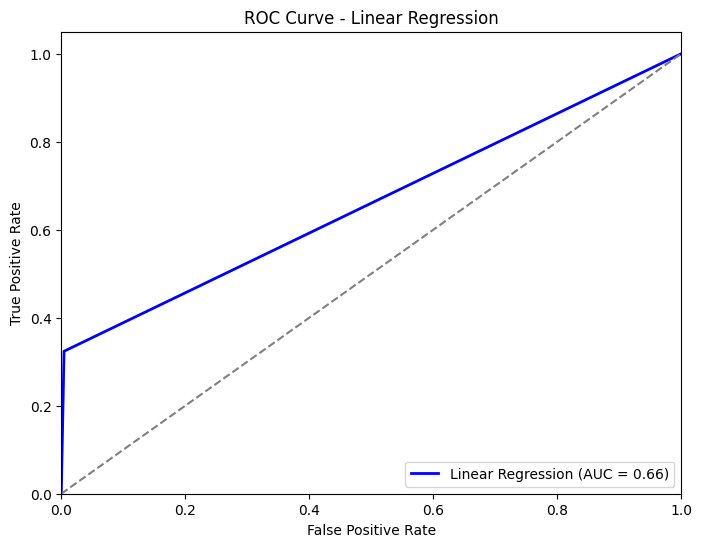

In [40]:
# ROC Curve for Linear Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Linear Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear Regression')
plt.legend(loc="lower right")
plt.show()

In [41]:

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [42]:
y_pred_knn = knn.predict(X_test_scaled)

print("\nKNN Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R²:", r2_score(y_test, y_pred_knn))


KNN Regression:
MAE: 0.0572
MSE: 0.03432000000000001
RMSE: 0.1852565788305506
R²: 0.6347964884277733


In [43]:
y_pred_knn_class = (y_pred_knn >= 0.5).astype(int)

acc_knn = accuracy_score(y_test, y_pred_knn_class)
print("Accuracy (KNN):", acc_knn)

Accuracy (KNN): 0.954


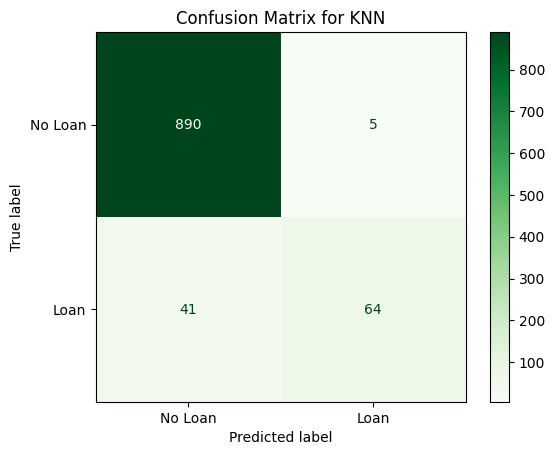

In [44]:
cm_knn = confusion_matrix(y_test, y_pred_knn_class)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['No Loan', 'Loan'])
disp_knn.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix for KNN')
plt.show()

In [45]:
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn_class, target_names=['No Loan', 'Loan']))

Classification Report for KNN:
              precision    recall  f1-score   support

     No Loan       0.96      0.99      0.97       895
        Loan       0.93      0.61      0.74       105

    accuracy                           0.95      1000
   macro avg       0.94      0.80      0.86      1000
weighted avg       0.95      0.95      0.95      1000



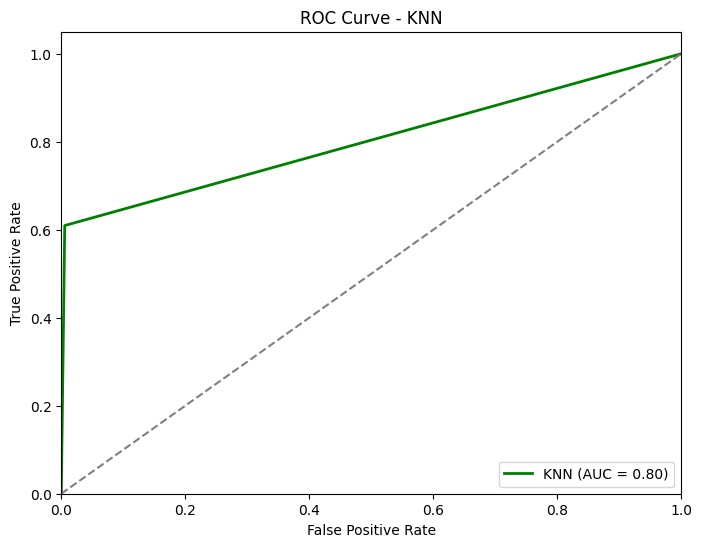

In [46]:
# ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_class)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

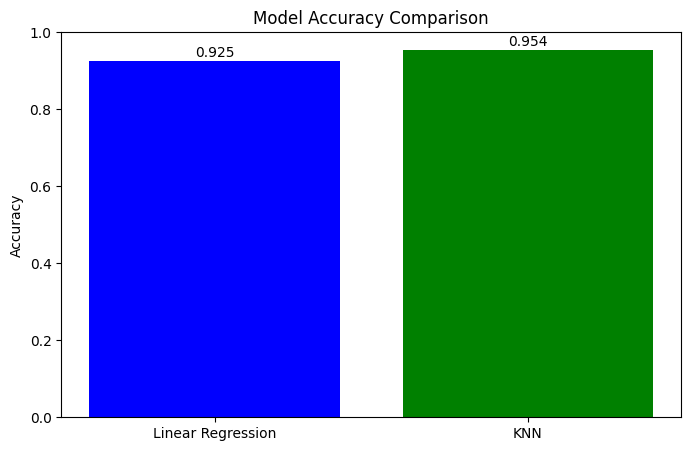

In [47]:
models = ['Linear Regression', 'KNN']
accuracies = [acc_lr, acc_knn]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.show()